# comparing AK_Bristol, AK_CPOM, IS2 and SM-LG smoothed anomalies for 2019-2020 season

In [1]:
import numpy as np
from scipy.stats import pearsonr
import datetime
import pandas as pd
import glob
import matplotlib.pyplot as plt
import warnings
import datetime
warnings.filterwarnings("ignore")

In [2]:
def runningmean(means,T):
    r=[]
    for i in range(T):
        r.append(np.nanmean(means[0:i+T+1]))

    for i in range(T,np.size(means)-T):
        r.append(np.nanmean(means[i-T:i+T+1]))

    for i in range(np.size(means)-T,np.size(means)):
        r.append(np.nanmean(means[i-T:]))

    return r

In [3]:
# load data
df = pd.read_csv('/Users/carmennab/PhD/OI_PolarSnow/dataframes/WG_vs_SM_dailymeans.csv',header=[0])
sats = ['AK_Bristol','AK_CPOM','SM','IS2']

days = np.arange(0,178)
dates = [datetime.date(2019,11,5)+datetime.timedelta(days=np.int(days)) for days in days]

rm1 = 15
rm2 = 4

data={}
for sat in sats:
    data[sat+'_dm'] = df[sat][3595:3773] # daily means
    data[sat+'_rm'] = runningmean(df[sat][3595:3773],T=rm1) # 30-day running mean of daily means
    data[sat+'_ua'] = runningmean(np.asarray(data[sat+'_dm']) - np.asarray(data[sat+'_rm']), T=0) # difference between running and daily mean
    data[sat+'_sa'] = runningmean(np.asarray(data[sat+'_dm']) - np.asarray(data[sat+'_rm']), T=rm2) # 9-day mean of difference between running and daily mean
season = '2019-2020'

In [4]:
# daily timeseries

Text(0.08, 0.5, 'SnowModel Depth Daily Mean (m)')

<Figure size 432x288 with 0 Axes>

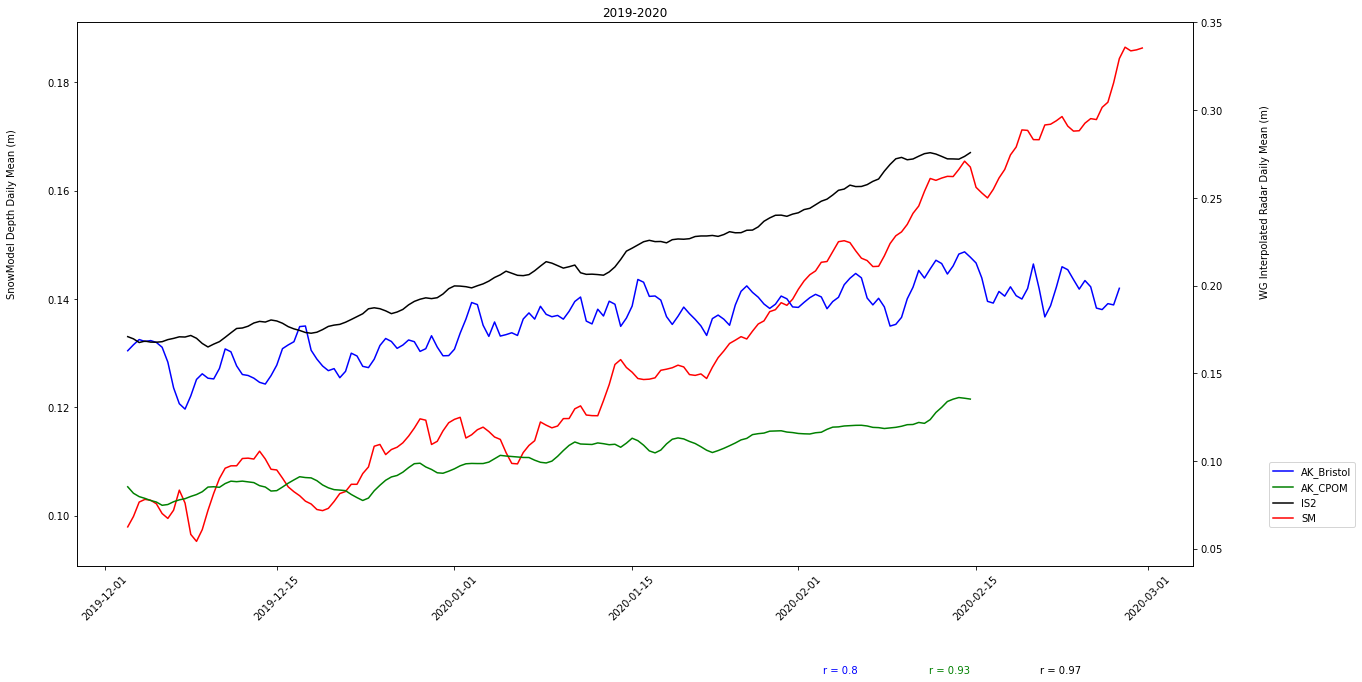

In [5]:
plt.figure()
fig, axs = plt.subplots(1,1,figsize=(20,10))

axs.plot(dates,data['SM_dm'],color='r')
ax1b = axs.twinx()
ax1b.plot(dates,data['AK_Bristol_dm'],label='AK_Bristol',color='blue')
ax1b.plot(dates,data['AK_CPOM_dm'],label='AK_CPOM',color='green')
ax1b.plot(dates,data['IS2_dm'],label='IS2',color='black')
ax1b.set_ylim([0.04, 0.35])
ax1b.plot([dates[40]],[0],color='r',label='SM')

labels = [season.split('-')[0]+'-12-01', season.split('-')[0]+'-12-15', 
          season.split('-')[1]+'-01-01', season.split('-')[1]+'-01-15',
          season.split('-')[1]+'-02-01', season.split('-')[1]+'-02-15',
          season.split('-')[1]+'-03-01', season.split('-')[1]+'-03-15',
          season.split('-')[1]+'-04-01']
ax1b.set_title(season)
axs.set_xticklabels(labels,rotation=45)

# stats
fb = np.asarray(data['AK_Bristol_dm'])
snow = np.asarray(data['SM_dm'])
mask = ~np.isnan(fb) & ~np.isnan(snow)
rstats = pearsonr(fb[mask],snow[mask])
r = np.round(rstats[0],decimals=2)
ax1b.annotate(f'r = {r}',xy=(0.7,-0.2),va='bottom',ha='right',xycoords='axes fraction',color='blue')

fb = np.asarray(data['AK_CPOM_dm'])
snow = np.asarray(data['SM_dm'])
mask = ~np.isnan(fb) & ~np.isnan(snow)
rstats = pearsonr(fb[mask],snow[mask])
r = np.round(rstats[0],decimals=2)
ax1b.annotate(f'r = {r}',xy=(0.8,-0.2),va='bottom',ha='right',xycoords='axes fraction',color='green')

fb = np.asarray(data['IS2_dm'])
snow = np.asarray(data['SM_dm'])
mask = ~np.isnan(fb) & ~np.isnan(snow)
rstats = pearsonr(fb[mask],snow[mask])
r = np.round(rstats[0],decimals=2)
ax1b.annotate(f'r = {r}',xy=(0.9,-0.2),va='bottom',ha='right',xycoords='axes fraction',color='black')

ax1b.legend(bbox_to_anchor = (1.15, 0.2))
fig.text(0.95, 0.5, 'WG Interpolated Radar Daily Mean (m)', ha='center', rotation='vertical')
fig.text(0.08, 0.5, 'SnowModel Depth Daily Mean (m)', ha='center', rotation='vertical')

# 30-day running mean

Text(0.08, 0.5, 'SnowModel Depth 30-Day Running Mean (m)')

<Figure size 432x288 with 0 Axes>

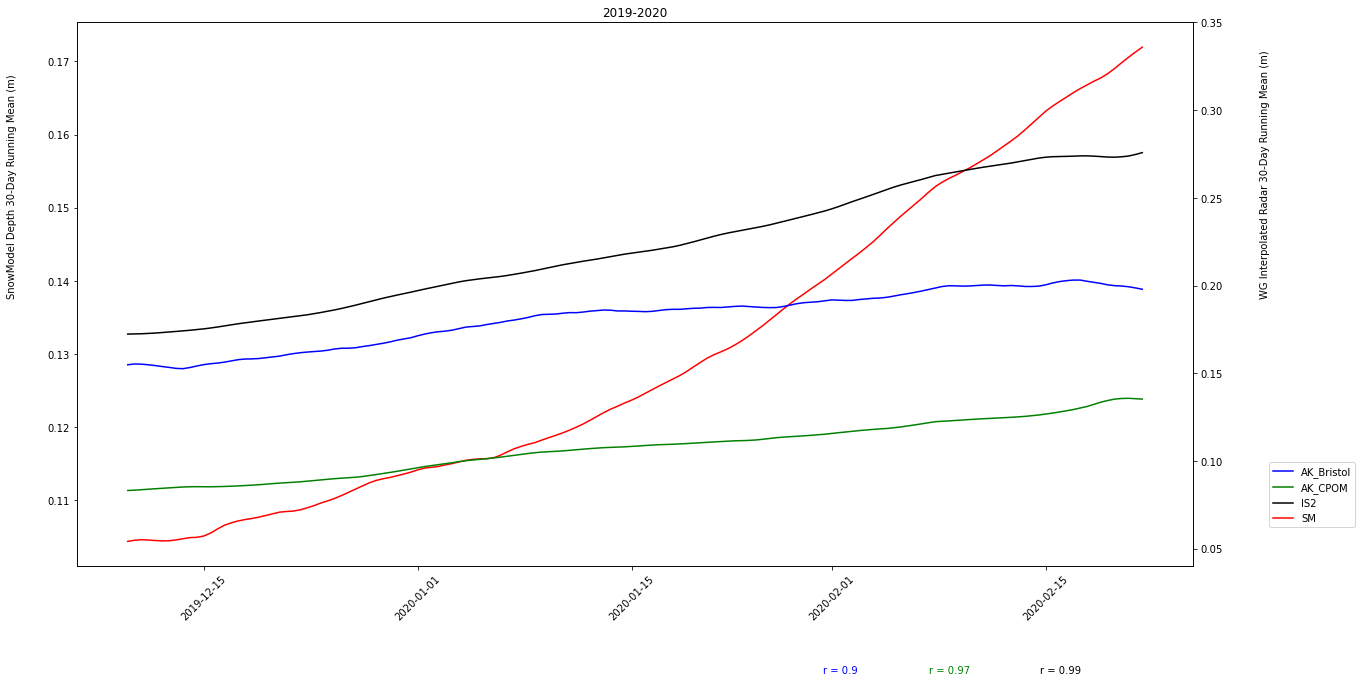

In [6]:
rm1 = 15
rm2 = 4

plt.figure()
fig, axs = plt.subplots(1,1,figsize=(20,10))

axs.plot(dates[(rm1):-(rm1)],data['SM_rm'][(rm1):-(rm1)],color='r')
ax1b = axs.twinx()
ax1b.plot(dates[(rm1):-(rm1)],data['AK_Bristol_rm'][(rm1):-(rm1)],label='AK_Bristol',color='blue')
ax1b.plot(dates[(rm1):-(rm1)],data['AK_CPOM_rm'][(rm1):-(rm1)],label='AK_CPOM',color='green')
ax1b.plot(dates[(rm1):-(rm1)],data['IS2_rm'][(rm1):-(rm1)],label='IS2',color='black')
ax1b.set_ylim([0.04, 0.35])
ax1b.plot([dates[40]],[0],color='r',label='SM')

labels = [season.split('-')[0]+'-12-15', season.split('-')[1]+'-01-01',
          season.split('-')[1]+'-01-15', season.split('-')[1]+'-02-01', 
          season.split('-')[1]+'-02-15', season.split('-')[1]+'-03-01',
          season.split('-')[1]+'-03-15']
ax1b.set_title(season)
axs.set_xticklabels(labels,rotation=45)

# stats
fb = np.asarray(data['AK_Bristol_rm'])
snow = np.asarray(data['SM_rm'])
mask = ~np.isnan(fb) & ~np.isnan(snow)
rstats = pearsonr(fb[mask],snow[mask])
r = np.round(rstats[0],decimals=2)
ax1b.annotate(f'r = {r}',xy=(0.7,-0.2),va='bottom',ha='right',xycoords='axes fraction',color='blue')

fb = np.asarray(data['AK_CPOM_rm'])
snow = np.asarray(data['SM_rm'])
mask = ~np.isnan(fb) & ~np.isnan(snow)
rstats = pearsonr(fb[mask],snow[mask])
r = np.round(rstats[0],decimals=2)
ax1b.annotate(f'r = {r}',xy=(0.8,-0.2),va='bottom',ha='right',xycoords='axes fraction',color='green')

fb = np.asarray(data['IS2_rm'])
snow = np.asarray(data['SM_rm'])
mask = ~np.isnan(fb) & ~np.isnan(snow)
rstats = pearsonr(fb[mask],snow[mask])
r = np.round(rstats[0],decimals=2)
ax1b.annotate(f'r = {r}',xy=(0.9,-0.2),va='bottom',ha='right',xycoords='axes fraction',color='black')

ax1b.legend(bbox_to_anchor = (1.15, 0.2))
fig.text(0.95, 0.5, 'WG Interpolated Radar 30-Day Running Mean (m)', ha='center', rotation='vertical')
fig.text(0.08, 0.5, 'SnowModel Depth 30-Day Running Mean (m)', ha='center', rotation='vertical')

# unsmoothed anomalies

Text(0.08, 0.5, 'SnowModel Depth Unsmoothed Anomaly (m)')

<Figure size 432x288 with 0 Axes>

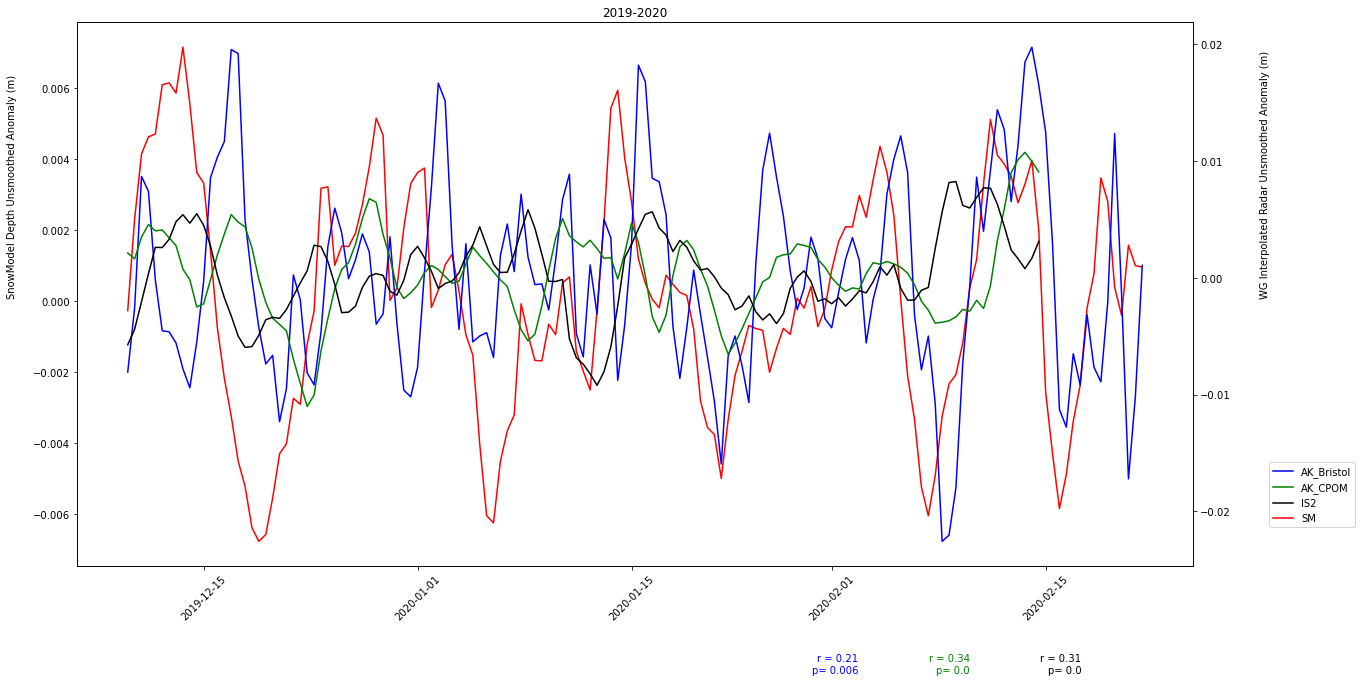

In [7]:
rm1 = 15
rm2 = 4

plt.figure()
fig, axs = plt.subplots(1,1,figsize=(20,10))

axs.plot(dates[(rm1):-(rm1)],data['SM_ua'][(rm1):-(rm1)],color='r')
ax1b = axs.twinx()
ax1b.plot(dates[(rm1):-(rm1)],data['AK_Bristol_ua'][(rm1):-(rm1)],label='AK_Bristol',color='blue')
ax1b.plot(dates[(rm1):-(rm1)],data['AK_CPOM_ua'][(rm1):-(rm1)],label='AK_CPOM',color='green')
ax1b.plot(dates[(rm1):-(rm1)],data['IS2_ua'][(rm1):-(rm1)],label='IS2',color='black')
#ax1b.set_ylim([0.04, 0.35])
ax1b.plot([dates[40]],[0],color='r',label='SM')

labels = [season.split('-')[0]+'-12-15', season.split('-')[1]+'-01-01',
          season.split('-')[1]+'-01-15', season.split('-')[1]+'-02-01', 
          season.split('-')[1]+'-02-15', season.split('-')[1]+'-03-01',
          season.split('-')[1]+'-03-15']
ax1b.set_title(season)
axs.set_xticklabels(labels,rotation=45)

# stats
fb = np.asarray(data['AK_Bristol_ua'])
snow = np.asarray(data['SM_ua'])
mask = ~np.isnan(fb) & ~np.isnan(snow)
rstats = pearsonr(fb[mask],snow[mask])
r = np.round(rstats[0],decimals=2)
p = np.round(rstats[1],decimals=3)
ax1b.annotate(f'r = {r}\np= {p}',xy=(0.7,-0.2),va='bottom',ha='right',xycoords='axes fraction',color='blue')

fb = np.asarray(data['AK_CPOM_ua'])
snow = np.asarray(data['SM_ua'])
mask = ~np.isnan(fb) & ~np.isnan(snow)
rstats = pearsonr(fb[mask],snow[mask])
r = np.round(rstats[0],decimals=2)
p = np.round(rstats[1],decimals=3)
ax1b.annotate(f'r = {r}\np= {p}',xy=(0.8,-0.2),va='bottom',ha='right',xycoords='axes fraction',color='green')

fb = np.asarray(data['IS2_ua'])
snow = np.asarray(data['SM_ua'])
mask = ~np.isnan(fb) & ~np.isnan(snow)
rstats = pearsonr(fb[mask],snow[mask])
r = np.round(rstats[0],decimals=2)
p = np.round(rstats[1],decimals=3)
ax1b.annotate(f'r = {r}\np= {p}',xy=(0.9,-0.2),va='bottom',ha='right',xycoords='axes fraction',color='black')

ax1b.legend(bbox_to_anchor = (1.15, 0.2))
fig.text(0.95, 0.5, 'WG Interpolated Radar Unsmoothed Anomaly (m)', ha='center', rotation='vertical')
fig.text(0.08, 0.5, 'SnowModel Depth Unsmoothed Anomaly (m)', ha='center', rotation='vertical')


# smoothed anomalies

Text(0.08, 0.5, 'SnowModel Depth Smoothed Anomaly (m)')

<Figure size 432x288 with 0 Axes>

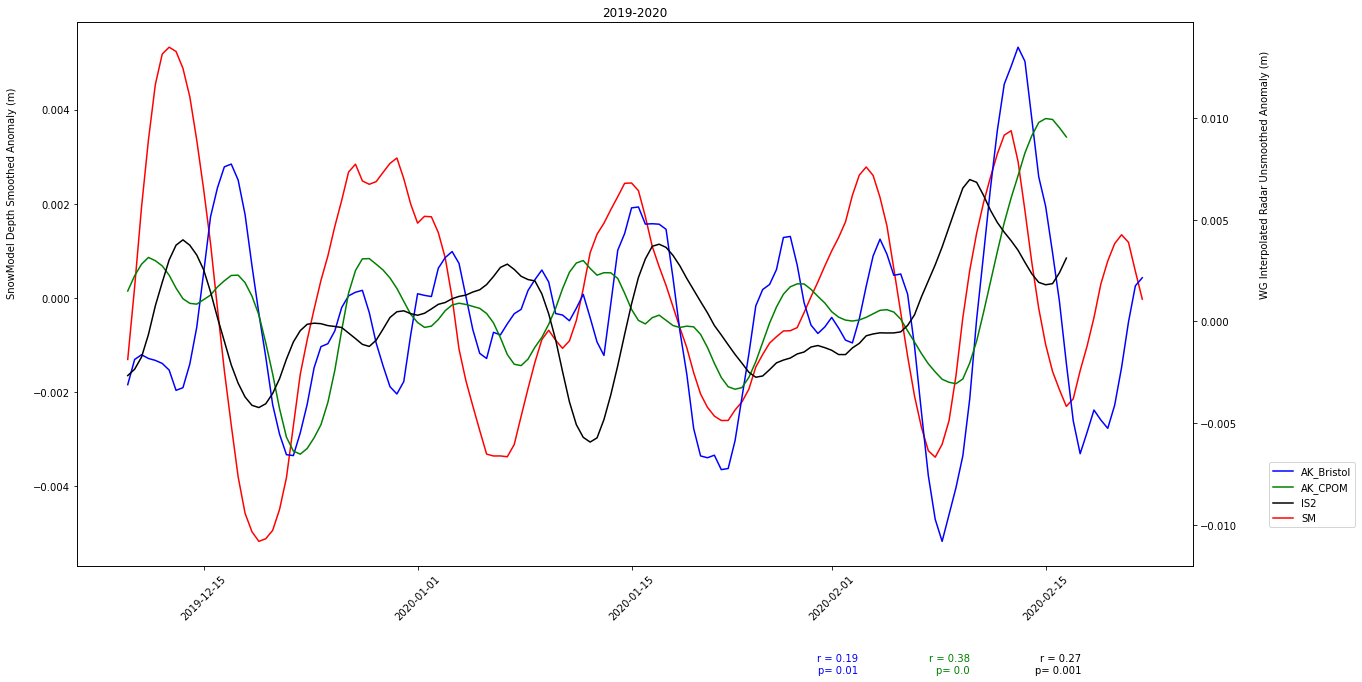

In [8]:
rm1 = 15
rm2 = 4

plt.figure()
fig, axs = plt.subplots(1,1,figsize=(20,10))

axs.plot(dates[(rm1):-(rm1)],data['SM_sa'][(rm1):-(rm1)],color='r')
ax1b = axs.twinx()
ax1b.plot(dates[(rm1):-(rm1)],data['AK_Bristol_sa'][(rm1):-(rm1)],label='AK_Bristol',color='blue')
ax1b.plot(dates[(rm1):-(rm1)],data['AK_CPOM_sa'][(rm1):-(rm1)],label='AK_CPOM',color='green')
ax1b.plot(dates[(rm1):-(rm1)],data['IS2_sa'][(rm1):-(rm1)],label='IS2',color='black')
#ax1b.set_ylim([0.04, 0.35])
ax1b.plot([dates[40]],[0],color='r',label='SM')

labels = [season.split('-')[0]+'-12-15', season.split('-')[1]+'-01-01',
          season.split('-')[1]+'-01-15', season.split('-')[1]+'-02-01', 
          season.split('-')[1]+'-02-15', season.split('-')[1]+'-03-01',
          season.split('-')[1]+'-03-15']
ax1b.set_title(season)
axs.set_xticklabels(labels,rotation=45)

# stats
fb = np.asarray(data['AK_Bristol_sa'])
snow = np.asarray(data['SM_sa'])
mask = ~np.isnan(fb) & ~np.isnan(snow)
rstats = pearsonr(fb[mask],snow[mask])
r = np.round(rstats[0],decimals=2)
p = np.round(rstats[1],decimals=3)
ax1b.annotate(f'r = {r}\np= {p}',xy=(0.7,-0.2),va='bottom',ha='right',xycoords='axes fraction',color='blue')

fb = np.asarray(data['AK_CPOM_sa'])
snow = np.asarray(data['SM_sa'])
mask = ~np.isnan(fb) & ~np.isnan(snow)
rstats = pearsonr(fb[mask],snow[mask])
r = np.round(rstats[0],decimals=2)
p = np.round(rstats[1],decimals=3)
ax1b.annotate(f'r = {r}\np= {p}',xy=(0.8,-0.2),va='bottom',ha='right',xycoords='axes fraction',color='green')

fb = np.asarray(data['IS2_sa'])
snow = np.asarray(data['SM_sa'])
mask = ~np.isnan(fb) & ~np.isnan(snow)
rstats = pearsonr(fb[mask],snow[mask])
r = np.round(rstats[0],decimals=2)
p = np.round(rstats[1],decimals=3)
ax1b.annotate(f'r = {r}\np= {p}',xy=(0.9,-0.2),va='bottom',ha='right',xycoords='axes fraction',color='black')

ax1b.legend(bbox_to_anchor = (1.15, 0.2))
fig.text(0.95, 0.5, 'WG Interpolated Radar Unsmoothed Anomaly (m)', ha='center', rotation='vertical')
fig.text(0.08, 0.5, 'SnowModel Depth Smoothed Anomaly (m)', ha='center', rotation='vertical')